In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import numpy as np

In [3]:
data={'car weight(ibs)':[1500,1800,2000,2500,3000],
     'MPG':[30,28,25,20,18]}
df=pd.DataFrame(data)
print(df)

   car weight(ibs)  MPG
0             1500   30
1             1800   28
2             2000   25
3             2500   20
4             3000   18


In [4]:
X=df[['car weight(ibs)']].values
y=df['MPG'].values
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [5]:
weight=model.coef_
bias=model.intercept_
prediction=(weight*1500)+bias
print(prediction)

[29.79036827]


In [6]:
from sklearn.metrics import mean_squared_error

In [142]:
def compute_loss(X,weight,bias,y):
    prediction=(weight*X)+bias
    return mean_squared_error(prediction,y)
def gradient_descent(X,weight,bias,y,prediction,rate=0.000000001):
    m=len(X)
    Loss=np.mean((prediction-y)**2)
    weight_gradient=(2/m)*np.sum(X*Loss)
    bias_gradient=(2/m)*np.sum(Loss)

    weight -= weight_gradient*rate
    bias -= bias_gradient*rate
    return weight,bias

In [143]:
np.random.seed(42)
weight=np.random.rand()
bias=np.random.rand()
iteration=1755
rate=0.000000001
Loss_history=[]
for l in range(iteration):
    weight,bias=gradient_descent(X,weight,bias,y,prediction,rate)
    Loss=compute_loss(X,weight,bias,y)
    Loss_history.append(Loss)
    print( Loss_history)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [136]:
# manual calculation
def manual_calculation():
    weight=0.1
    bias=0.1
    X=1500
    y=30
    rate=0.001
    prediction=(weight*X)+bias
    print(f'prediction is {prediction}>>')
    
    
    Mse=(prediction-y)**2
    print(f'the mse error is {Mse}>>')

    
    
    Loss=np.mean((prediction-y)**2)
    weight_gradient=(2)*np.sum(X*Loss)
    bias_gradient=(2)*np.sum(Loss)
    print(f'the gd_Weight is {weight_gradient} and gd bias{bias_gradient}')

    weight -= weight_gradient*rate
    bias -= bias_gradient*rate
    print(f' the weight is {weight} and the bias is {bias} after the first iteration')
    

In [137]:
X=df[['car weight(ibs)']].values
y=df['MPG'].values
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [86]:
new_MPG=pd.DataFrame({'car weight(ibs)':[2500]})
predicted_MPG=model.predict(new_MPG)[0]
print(f'the pridicted MPG of car weight(ibs):2500 is {predicted_MPG}')

the pridicted MPG of car weight(ibs):2500 is 21.32011331444759


C:\Users\Student.DESK-13\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


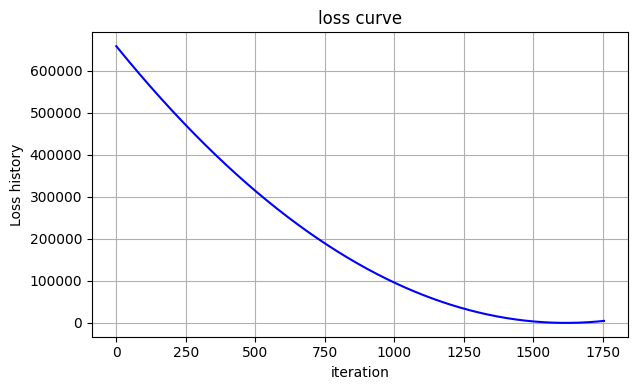

In [144]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iteration),Loss_history,color='blue')
plt.xlabel('iteration')
plt.ylabel('Loss history')
plt.title('loss curve')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

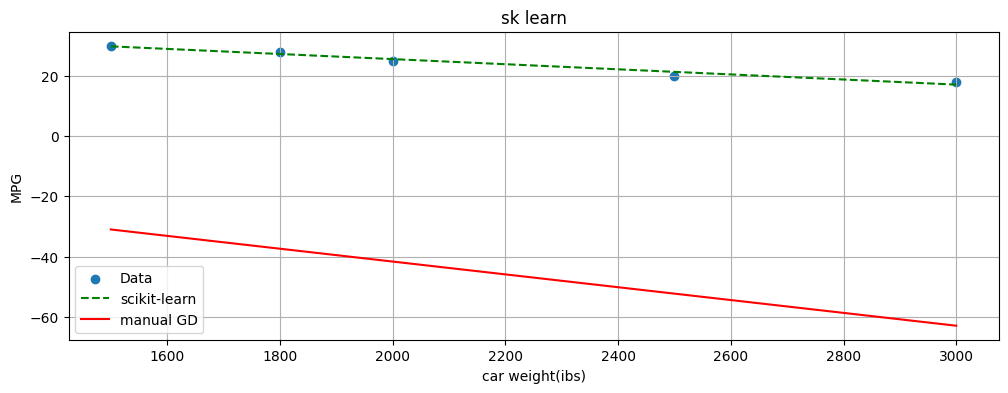

In [145]:
# plt.subplot(1,2,1)
# plt.plot(range(iteration),Loss_history,color='blue')
# plt.xlabel('iteration')
# plt.ylabel('Loss history')
# plt.title('loss curve')

# plt.subplot(1,2,2)
plt.figure(figsize=(12,4))
plt.scatter(X, y, label="Data")
plt.plot(X,model.predict(X),'g--',label='scikit-learn')
plt.plot(X,weight*X + bias, 'r-', label='manual GD')
plt.xlabel('car weight(ibs)')
plt.ylabel('MPG')
plt.title('sk learn')
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()